# Types of Charts and How to Make Them

We will explore several different types of standard charts and how to make them in several different plotting libraries.  

Before we do that, let use first explore the basics of each plotting tool.

## Bascis of the Plotting Libraries

Some basic features that can be adjusted in almost any plot:

- **Figure size**: The actual dimensions of the image
- **DPI**: Dots Per Inch, the base resolution of the image (web images aroung 100-150, published images are usually 300 or more)
- **Format**: The image type (png, jpeg, svg, pdf, etc.)
- **Titles**: The title of the figure
- **X and Y labels**: The label for the horizontal and vertical axes
- **X and Y tick marks**: The tick marks for the horizontal and vertical axes
- **X and Y limits**: The minimum and maximum of the horizontal and vertical range
- **Axes**: Can be switched on or off
- **FrameStyle**: The type of outline of the axes
- **Legends**: Key for the different curves or data plotted
- **Grids**: Background grid for ease of reading numerical values
- **Colors**: The color of the different elements
- **Marker Types**: The data point indicator (circles, stars, squares, diamonds, etc.)
- **Linetypes**: The type and shape of lines (solid, dashed, dotted, etc.)


In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Matplotlib

More complete documentation located [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

In [2]:
import matplotlib.pyplot as plt

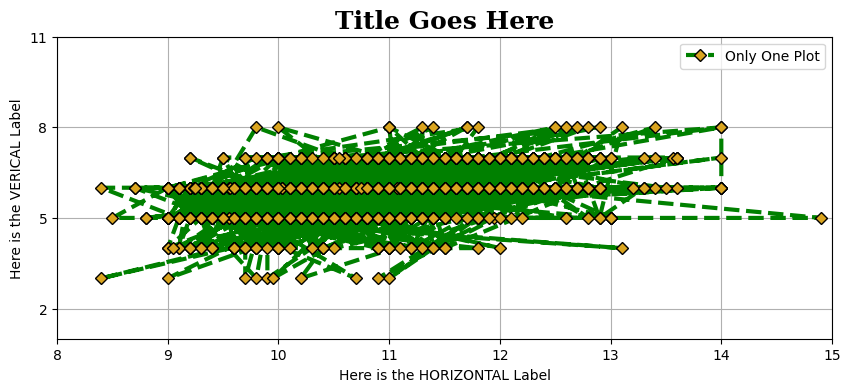

In [3]:
plt.figure(figsize = (10,4), dpi = 100) # Adjust figure size and resolution

plt.plot(data.alcohol, data.quality, # Give the X and Y data to plot
         marker = "D",    # The marker TYPE, here a diamon
         markersize = 6,  # The marker size, bigger makes the points larger
         markerfacecolor = "goldenrod", # The color of the FACE (area) of marker
         markeredgecolor = "black",     # The color of the EDGE (line) of the marker
         color = "green",     # The color of the line (will set the others if left unset)
         linestyle = "dashed", # The type of the line
         linewidth = 3         # Sets the width of the line
         )

# Changing the Title and Labels
plt.title("Title Goes Here", {"size":18, "fontname":"serif", "weight":"bold"})
plt.xlabel("Here is the HORIZONTAL Label")
plt.ylabel("Here is the VERICAL Label")

# Changing the x and y ticks
plt.xticks([8,9,10,11,12,13,14,15])
plt.yticks([2,5,8,11])

# Changing the x and y limits
plt.xlim(8,15)
plt.ylim(1,11)

# Legends are given in the order of the plots
plt.legend( ["Only One Plot", "Here is the 2nd plot"] )

plt.grid(True) # True sets grids to ON, False sets grids to OFF

plt.axis(True) # True sets the frame around to ON, False sets grids to OFF

# To change the Box parts individually
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')

# Save the figure in a particular format
plt.savefig("my_sweet_figure.pdf")

#### Seaborn

More documentation can be found [here](https://seaborn.pydata.org/).

Because Seaborn is built on top of Matplotlib, most of the settings carry over exactly.

In [4]:
import seaborn as sns

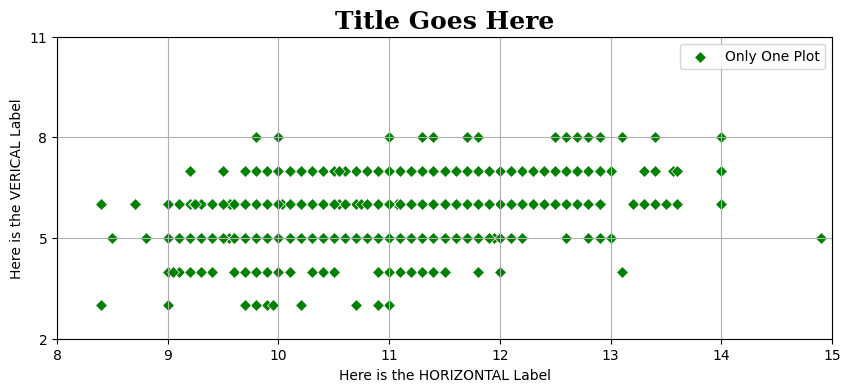

In [5]:
plt.figure(figsize = (10,4), dpi = 100) # Adjust figure size and resolution

# Plot some data
sns.scatterplot(x = "alcohol", y = "quality", data = data,
                marker="D",
                color="green")

# Changing the Title and Labels
plt.title("Title Goes Here", {"size":18, "fontname":"serif", "weight":"bold"})
plt.xlabel("Here is the HORIZONTAL Label")
plt.ylabel("Here is the VERICAL Label")

# Changing the x and y ticks
plt.xticks([8,9,10,11,12,13,14,15])
plt.yticks([2,5,8,11])

# Changing the x and y limits
plt.xlim(8,15)
plt.ylim(2,11)

# Legends are given in the order of the plots
plt.legend(["Only One Plot", "Here is the 2nd plot"])

plt.grid(True) # True sets grids to ON, False sets grids to OFF

plt.axis(True) # True sets the frame around to ON, False sets grids to OFF

# To change the Box parts individually
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')

plt.savefig("my_sweet_figure.png")

#### Plotly

More documentation can be found [here](https://plotly.com/python/plotly-express/).

In [6]:
import plotly.express as px

In [7]:
fig = px.scatter(data, x="alcohol", y="quality",
                 title = "Here is my Title",
                 width = 1000,
                 height = 500)
fig.show()

## Types of Charts

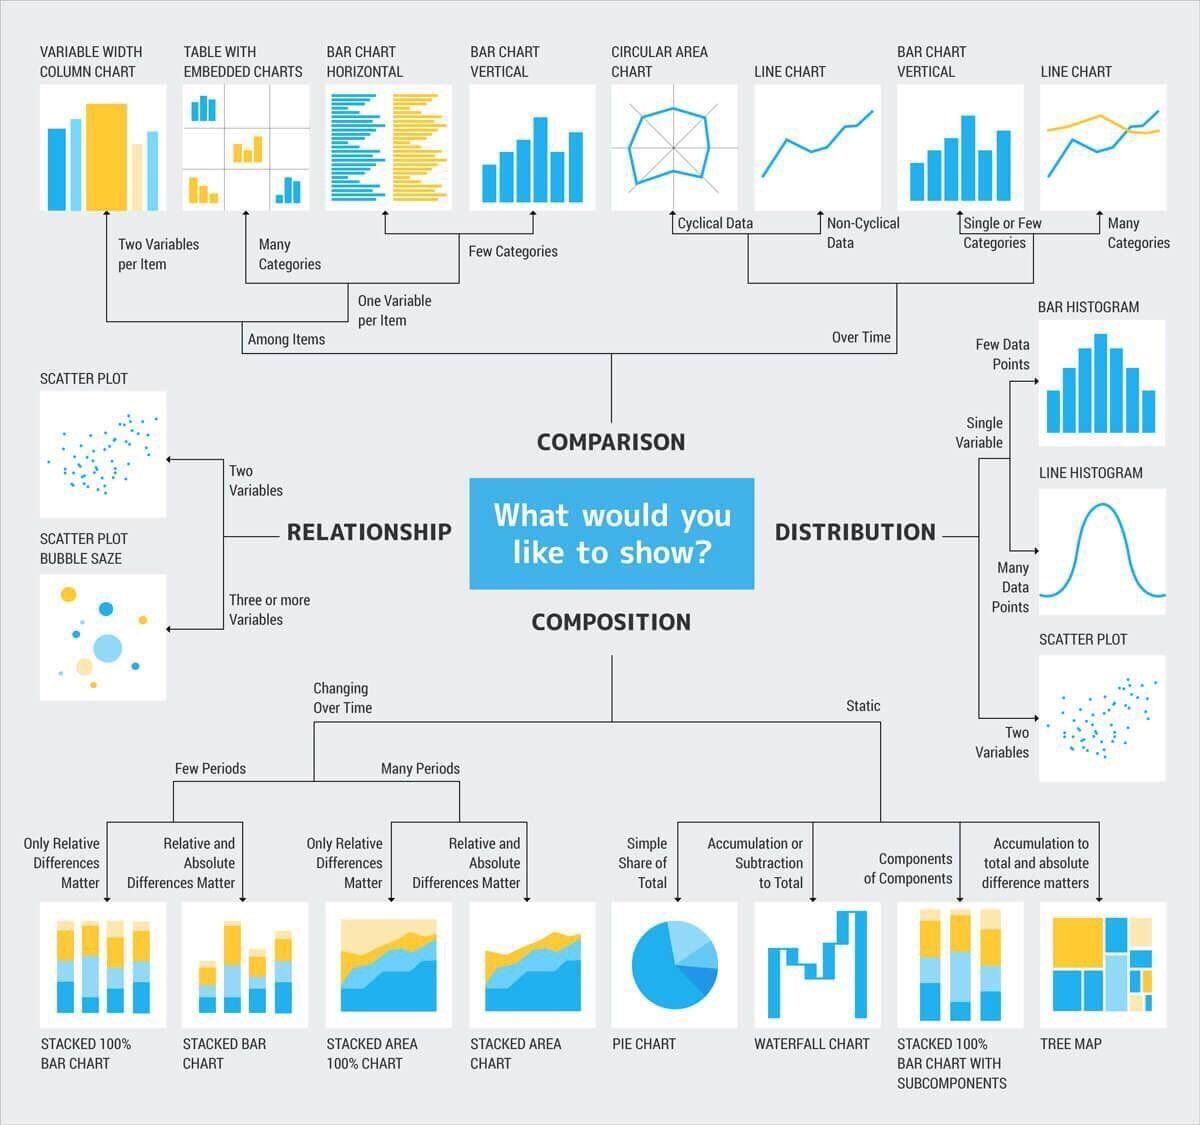

## Plots for Visualizing Relationships

### Scatter/Bubble Plot

Great for showing relationships between two or more variables.  These graphes typically do not have lines, since we do not think of the data points as having a particular "order".

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


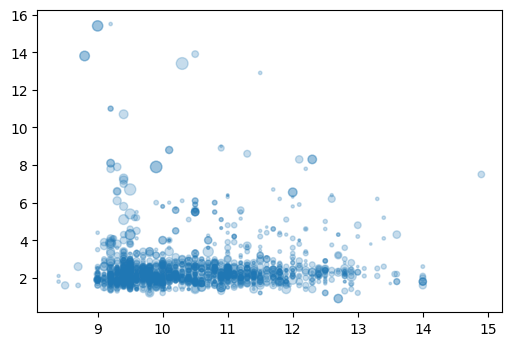

In [9]:
plt.figure(dpi=100)
plt.scatter(data.alcohol, data["residual sugar"] , s = data["free sulfur dioxide"], alpha = 0.25)
plt.show()

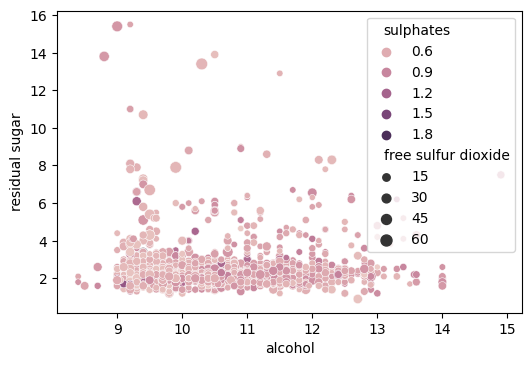

In [10]:
plt.figure(dpi=100)
sns.scatterplot(x="alcohol", y="residual sugar", 
                size = "free sulfur dioxide", hue = "sulphates", 
                data=data)
plt.show()

In [11]:
px.scatter(data, x="fixed acidity", y="pH", 
           size = "citric acid", 
           color = "volatile acidity")

### Correlation Plots

Manually looking through the correlation for a data set can be tough.  Instead, we can plot it using a histogram!  This allows us to visually inspect the correlation without sifting through all the data.

In [12]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


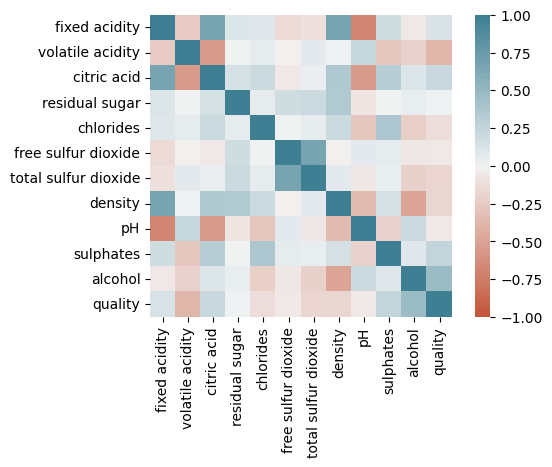

In [13]:
plt.figure(dpi=100)

ax = sns.heatmap( data.corr(),
    vmin=-1, 
    vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.show()

In [14]:
px.imshow(data.corr())

## Plots for Distributions

### Histograms and Density Plots

These are good for visualizing the distributions of things, or the basic shape of the data.  Density plots are smooth approximations of the histograms.

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


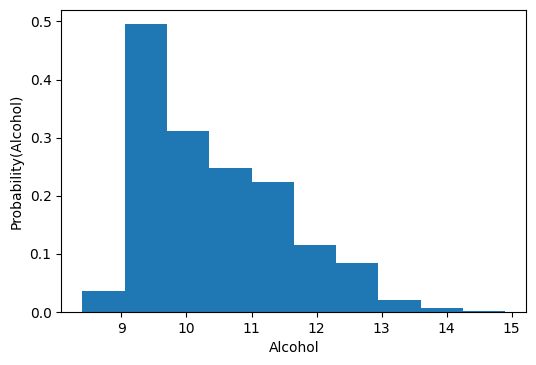

In [16]:
plt.figure(dpi=100)
plt.hist(data.alcohol, 
         bins = 10, 
         density=True, 
         align="mid",
         orientation="vertical"
         )

plt.xlabel("Alcohol")
plt.ylabel("Probability(Alcohol)")

plt.show()

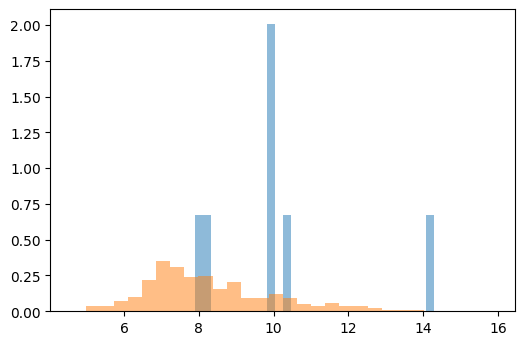

In [17]:
plt.figure(dpi=100)
plt.hist(data[data['alcohol'] < 9]['fixed acidity'], 
         bins = 30, 
         density=True, 
         align="mid",
         orientation="vertical",
         alpha = 0.5
         )

plt.hist(data[data['alcohol'] > 9]['fixed acidity'], 
         bins = 30, 
         density=True, 
         align="mid",
         orientation="vertical",
         alpha = 0.5
         )
plt.show()

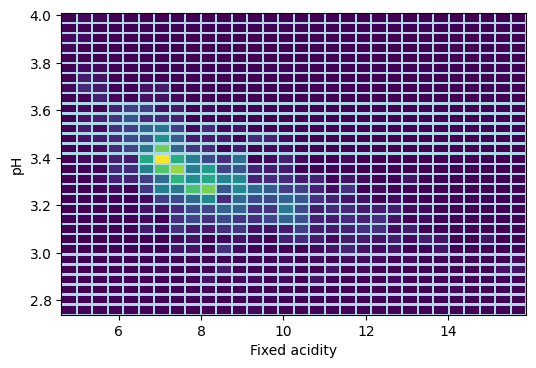

In [18]:
plt.figure(dpi=100)
plt.hist2d(data['fixed acidity'], data['pH'], 
         bins = 30, 
         density=True,
         color = "lightblue"
         )

plt.xlabel("Fixed acidity")
plt.ylabel("pH")

plt.show()

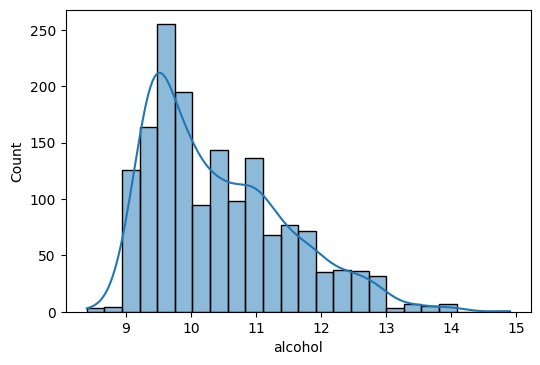

In [19]:
plt.figure(dpi=100)

sns.histplot(data["alcohol"], kde=True)

plt.show()

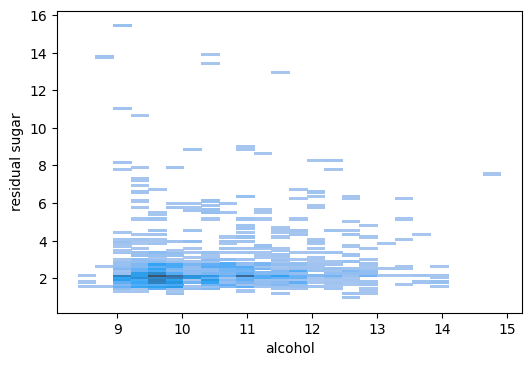

In [20]:
plt.figure(dpi=100)

sns.histplot(data, x="alcohol", y="residual sugar")

plt.show()

In [21]:
px.histogram(data, x="alcohol", nbins=30)

### Violin Plots

Related to histogram plots, violin plots show a the smoothed distribution, usually oriented vertically.

In [22]:
?plt.violinplot

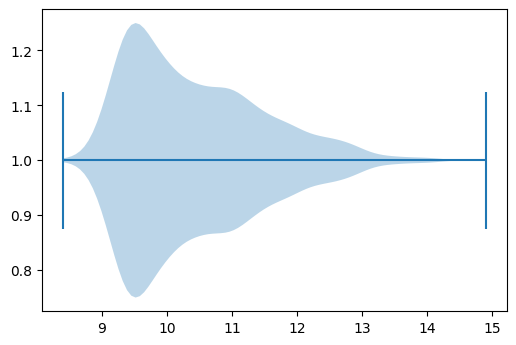

In [23]:
plt.figure(dpi=100)
plt.violinplot(data.alcohol, vert=False)
plt.show()

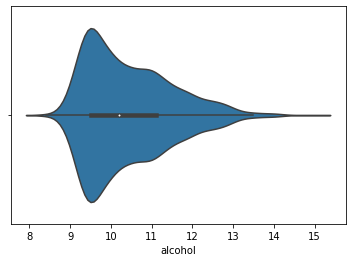

In [24]:
plt.figure()
sns.violinplot(x="alcohol", data = data)
plt.show()

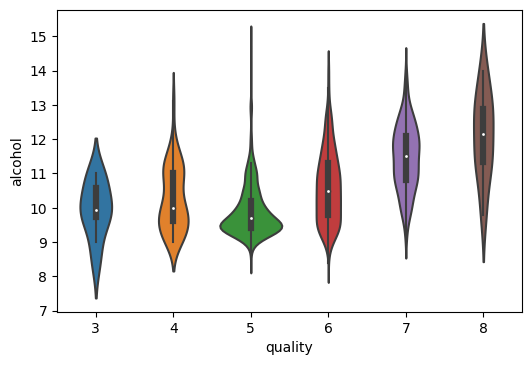

In [25]:
plt.figure(dpi=100)
sns.violinplot(x="quality", y= "alcohol", data = data)
plt.show()

### Box Plots (or Box and Whisker Plots)

These are also good for showing the distribution of a data set.

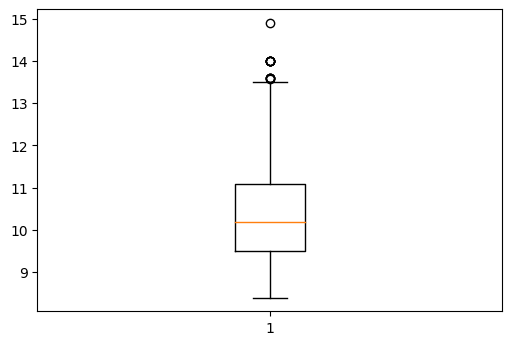

In [26]:
plt.figure(dpi=100)
plt.boxplot(data.alcohol)
plt.show()

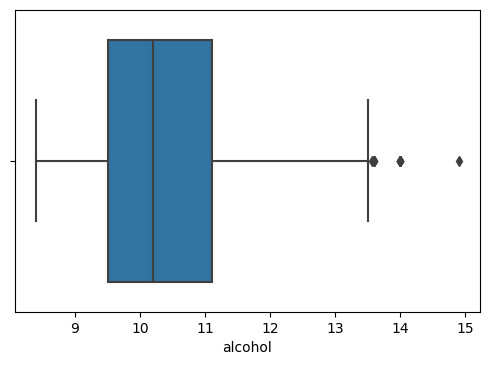

In [27]:
plt.figure(dpi=100)
sns.boxplot(x="alcohol", data = data)
plt.show()

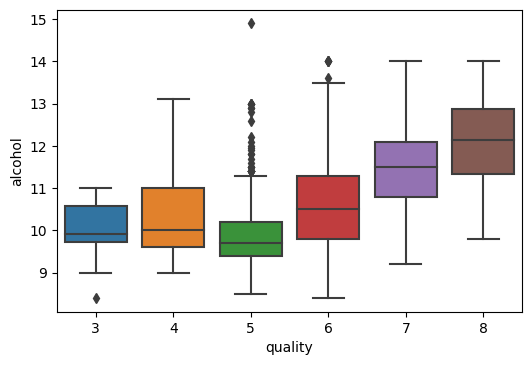

In [28]:
plt.figure(dpi=100)
sns.boxplot(x = "quality", y="alcohol", data = data)
plt.show()

## Pair Plots

Seaborn has a handy feature that will create every pair of scatter plot and histogram available from the data set.  Such a plot is usually BIG and can take awhile to compute, but it's really only intended to help us search for patterns in the dataset.  This might be something we generate early on while thinking about the data.

<Figure size 600x400 with 0 Axes>

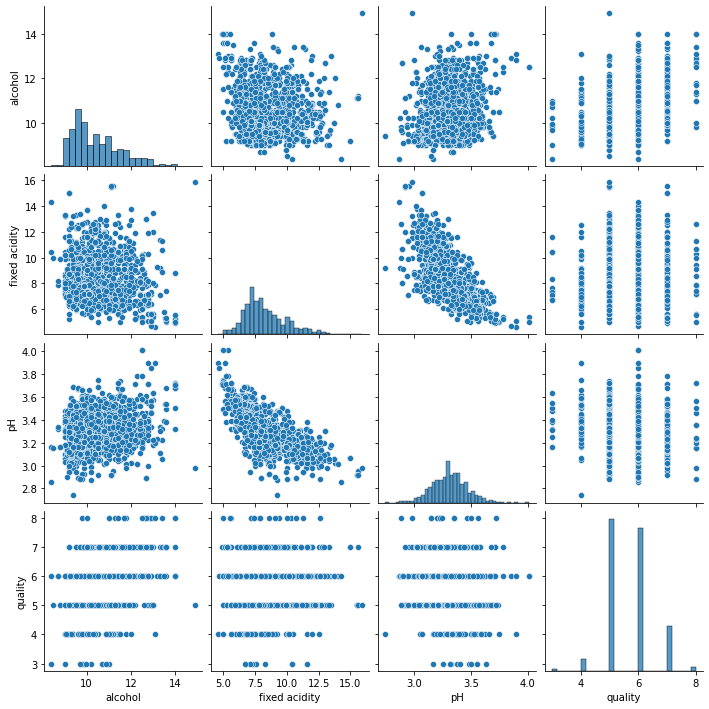

In [29]:
plt.figure(dpi=100)
sns.pairplot(data[['alcohol', 'fixed acidity', 'pH', 'quality']])
plt.show()

## Plots for Comparison

### Simple Bar Plot

Bar plots are excellent choices to compare individual values.  The bar visually gives the eye a place to attract, and it's height can help viewers better "feel" the value.

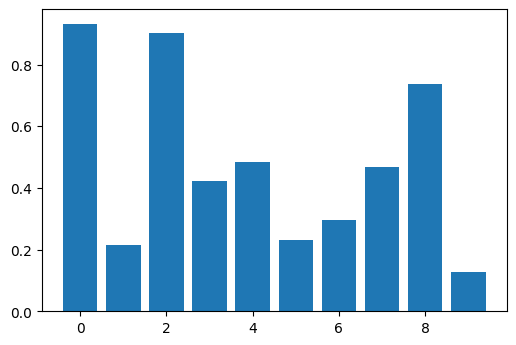

In [30]:
plt.figure(dpi=100)
plt.bar(range(10), np.random.rand(10))
plt.show()

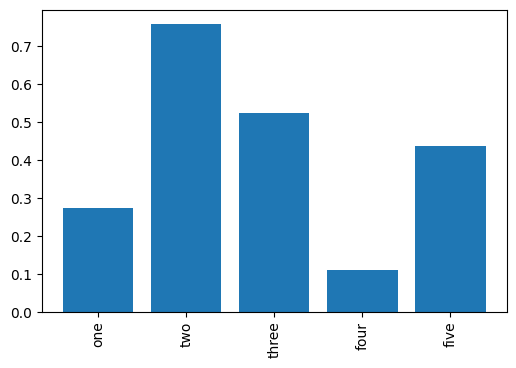

In [31]:
plt.figure(dpi=100)
plt.bar(range(5), np.random.rand(5))
plt.xticks(range(5), ["one", "two", "three", "four", "five"], rotation=90)
plt.show()

Creating barplots using matplotlib is straightforward, but perhaps overly simplistic.  We have to manually create the heights for the bars, rather than using a function.

Seaborn provides a much richer interface and automatically includes the uncertainty measurement.

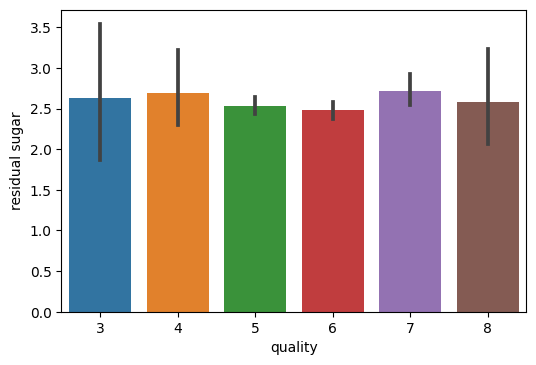

In [32]:
plt.figure(dpi=100)
sns.barplot( x = 'quality', y='residual sugar', data = data)
plt.show()

Here Seaborn has included a confidence interval of the mean for each bar (the black line).  It tells us where the mean of the data set would live with a 95% confidence.

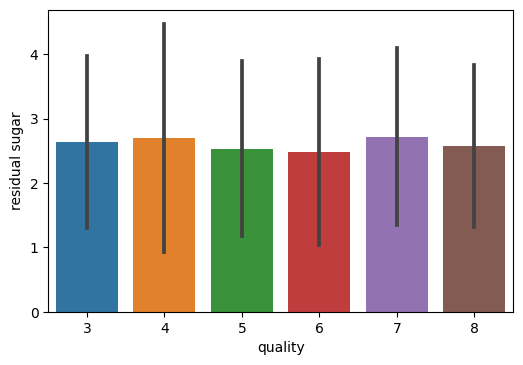

In [33]:
plt.figure(dpi=100)
sns.barplot( x = 'quality', y='residual sugar', data = data, ci='sd')
plt.show()

Instead of using the 95% confidence interval for the mean, we could also elect to use the Standard Deviation for each bar.  This is more typical.

In [34]:
data['alcohol_high'] = data.alcohol > 10

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_high
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


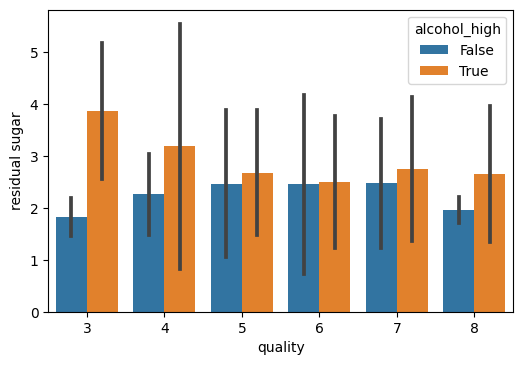

In [36]:
plt.figure(dpi=100)
sns.barplot( x = 'quality', y='residual sugar', hue='alcohol_high', data = data, ci='sd')
plt.show()

This is called a "grouped bar chart" 

In [37]:
px.bar(data,  x = 'quality', y='residual sugar')

This bar chart is not accurate.  It does not know by default how to *collapse* all the residual sugar values.  In Seaborn, it collapsed them all by taking the mean, but plotly does not automatically do this.  We have to manually collapse the data.

In [38]:
px.bar(data.groupby('quality').mean().reset_index(),  x = 'quality', y='residual sugar')

### Line Plots

Line plots are also great for comparing things.  They can work better than bar plots when we wish to compare several things.

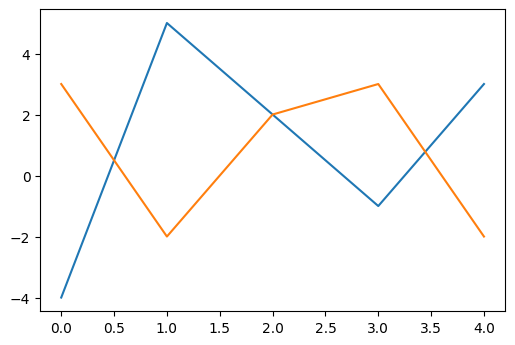

In [39]:
plt.figure(dpi=100)
plt.plot([0,1,2,3,4], [-4,5,2,-1,3])
plt.plot([0,1,2,3,4], [3,-2,2,3,-2])
plt.show()

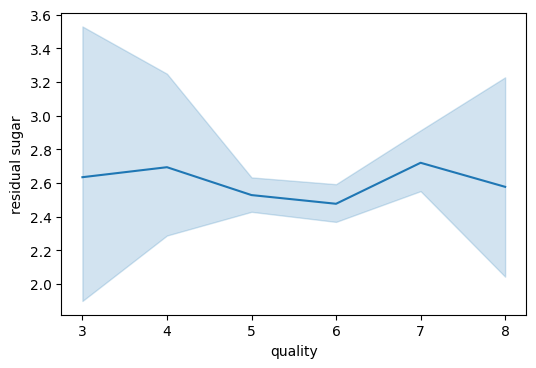

In [40]:
plt.figure(dpi=100)
sns.lineplot( x = 'quality', y='residual sugar', data = data)
plt.show()

The shaded region again represents the 95% confidence interval of the mean.

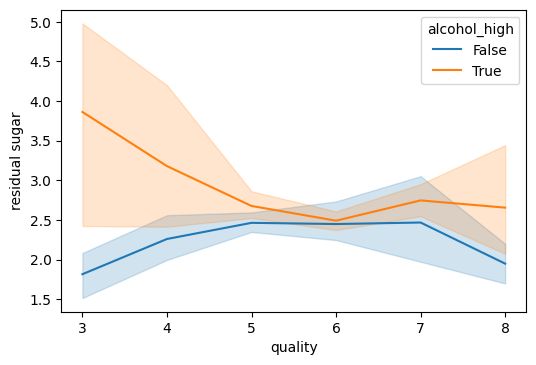

In [41]:
plt.figure(dpi=100)
sns.lineplot( x = 'quality', y='residual sugar', hue='alcohol_high', data = data)
plt.show()

In [42]:
px.line(data,  x = 'quality', y='residual sugar')

Again, this is incorrect.  Plotly does not know how to collapse the data set.  We can manually force it to do this, however.

In [43]:
px.line(data.groupby('quality').mean().reset_index(),  x = 'quality', y='residual sugar')